In [7]:
%load_ext autoreload
%autoreload 2

# 1. Context

We analyze the model developed as part of the rappi challenge proposed.

The developed package trains a binary classification model for the famous Titanic disaster dataset, based on a Random Forest. This type of model is ideal for analyzing the importance of input features and is generally robust.

Basic performance metrics were used:

1. Precision
2. Recall
3. F1 Score
   
Given the nature of the challenge, more elaborate metrics such as ROC or AUC were not further explored.

# 2. Objective
1. Analyze the evaluation metrics of the model.
2. Create a report on the importance of each feature in the model.
3. Outline a possible deployment plan for the model.

# 3. Metrics Analysis

By running the package with default arguments, we obtain:

Precision on test set: 0.7931034482758621

Recall on test set: 0.6666666666666666

F1 on test set: 0.7244094488188977

### Precision:
Precision is the ratio of true positive predictions to the total predicted positives. Mathematically, it is defined as:

$$Precision = \frac{TP}{TP + FP}$$
 

In the context of a binary classifier for the Titanic dataset:

Precision measures the accuracy of the survivors predictions made by the model.
A higher precision indicates that when the model predicts a survivor, it is more likely to be correct.
Given the precision value of approximately 0.79, it suggests that around 79% of the positive predictions (survivors) made by the model are correct.

### Recall:
Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives. Mathematically, it is defined as:

$$Recall = \frac{TP}{TP + FN}$$
​
In the context of a binary classifier for the Titanic dataset:

Recall measures the ability of the model to capture all positive instances (survivors) in the dataset.
A higher recall indicates that the model is good at identifying positive instances.
With a recall value of approximately 0.67, it suggests that the model captures around 67% of the actual positive instances in the dataset.

### F1 Score:
The F1 score is the harmonic mean of precision and recall. It is calculated as:

$$F_1 = 2 \times \left( \frac{Precision \times Recall}{Precision + Recall}\right)$$

In the context of a binary classifier for the Titanic dataset:

F1 score provides a balance between precision and recall. It is particularly useful when there is an uneven class distribution.
A higher F1 score indicates a better balance between precision and recall.
With an F1 score of approximately 0.72, it suggests a good balance between precision and recall, indicating a reasonably effective model.

### Interpretation:
The precision of 0.79 suggests that the model is relatively accurate when predicting positive outcomes.
The recall of 0.67 indicates that the model captures a substantial portion of the actual positive instances.
The F1 score of 0.72 suggests a balanced trade-off between precision and recall.
In conclusion, based on these metrics, the model appears to perform reasonably well for a binary classifier on the Titanic dataset. However, the assessment of whether the model is "good" depends on the specific requirements and priorities of the application. We would need to consider the context and consequences of false positives and false negatives to make a more informed decision.


# 4. Feature importance

We use a trained random forest for this analysis, by changing the path to another model (as the package does) the analysis can be conducted over other model configurations.

In [51]:
from joblib import load
import numpy as np
import pandas as pd
import seaborn as sn

sn.set_style("darkgrid")

In [18]:
# Load a pre-trained model

clf = load("/Users/dmejia/Desktop/rml/rappi-ml-challenge/20240119_091917_28752b52e90d41d78af1a7f159a207c8.joblib")
type(clf)

sklearn.ensemble._forest.RandomForestClassifier

In [24]:
# Calcualte feature's importance

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = clf.feature_names_in_

In [46]:
# Use dataframes to handle data

forest_importances = pd.DataFrame(importances, index=feature_names).reset_index().rename(columns={"index": "Feature", 0: "Importance"})


Index(['Feature', 'Importance'], dtype='object')

<AxesSubplot: xlabel='Feature', ylabel='Importance'>

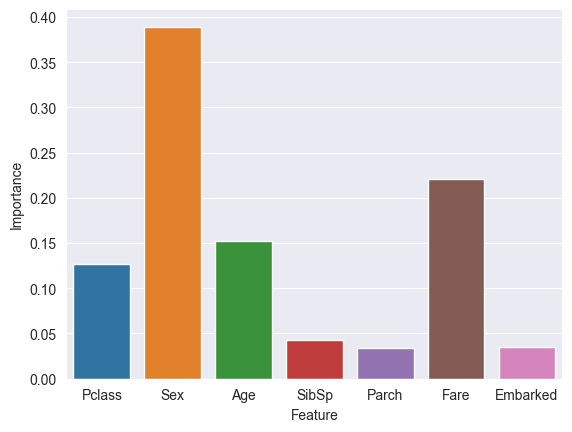

In [52]:
# Graph

sn.barplot(data=forest_importances, x="Feature", y="Importance")

As we can see the most important features are **sex**, **fare** and **age**, we can say that if you were a rich young woman on the Titanic, chances are you survived.

## Productive model

We based this on the experience on GCP.

### 1. Data Ingestion:
Source Data:
Store the dataset (or new data) in Google Cloud Storage (GCS).
Data Preprocessing:
Implement a Cloud Function to trigger preprocessing when new data is uploaded to GCS.
Use Cloud Functions for event-driven serverless functions.
Preprocess the data using the same logic applied during training.
### 2. Model Deployment:
Model Storage:
Save the trained model in a format compatible with AI Platform.
Use AI Platform Prediction for model storage.
Deploy to AI Platform:
Use AI Platform to deploy the model.
Set up the model version, specifying the trained model file and required dependencies.
Use AI Platform Prediction for deploying and managing the model.

### 3. Prediction Service:
Build an API:
Develop a simple Flask or FastAPI web service to handle prediction requests.
Use a lightweight web framework like Flask or FastAPI.
Deploy API on Google Cloud Run:
Containerize the API using Docker.
Deploy the container to Google Cloud Run for easy scaling and management.

### 4. Endpoints:
Expose API Endpoints:
Make the API accessible through a secure HTTPS endpoint.
Use API Gateway for managing and securing API access.
Utilize Cloud Endpoints for monitoring and controlling the API.
Monitor and Logging:
Set up Cloud Monitoring for tracking service performance.
Utilize Cloud Logging for error tracking and debugging.

### 5. Continuous Integration/Continuous Deployment (CI/CD):
Version Control:
Use Cloud Source Repositories for version control.
Use the Git repository provided by Cloud Source Repositories.
CI/CD Pipeline:
Implement a CI/CD pipeline using Cloud Build to automate testing and deployment.
Automate build, test, and deployment processes with Cloud Build.

### 6. Monitoring and Maintenance:
Monitoring:
Regularly monitor service usage, performance, and errors using Cloud Monitoring.
Set up custom dashboards for monitoring key metrics.
Maintenance:
Schedule periodic model updates for continuous improvement.
Use Cloud Scheduler to automate recurring tasks such as model updates.